# Krzysztof Nalepa
## Sprawozdanie z ćwiczenia 7

## Kwadratury Gaussa 

### Zadanie 1
Zaimplementuj całkowanie metodą Gaussa-Legendra stopnia 2 - 5.

Wyznaczyć wartości całek dla funkcji:

- $f(x) = 3x^3 - 1$ 
- $f(x) = 2 * x^2$
- $f(x) = 4*sin(x)$ 

Oczywiście, oblicz dokładne wartości całek oznaczonych! Porównać dokładność uzyskanych rezultatów z dokładnym wynikiem oraz z kwadraturami z poprzedniego ćwiczenia.

In [0]:
from scipy.special.orthogonal import roots_legendre
import numpy as np

def gauss_legendre_integration(function, a, b, n):
  [x, w] = roots_legendre(n + 1)
  i = (b - a) * 0.5
  j = (b - a) * 0.5 * x + (b + a) * 0.5
  return i * sum(w * np.vectorize(function)(j))

def rectangular_integration(function, a, b, i):
  dx = (b - a) / i
  start = a + (dx / 2)
  sum = 0

  for x in range(i):
    sum += function(start + x * dx) * dx
  return sum

def trapeze_integration(function, a, b, i):
  dx = (b - a) / i
  sum = 0

  for x in range(i):
    sum += (function(a + x * dx) + function(a + (x + 1) * dx)) / 2 * dx
  return sum


def simpson_integration(function, a, b, i):
  dx = (b - a) / i
  start = a + (dx / 2)
  sum = 0
  for x in range(i):
    sum += dx / 6 * (function(a + x * dx) + 4 * function(start + x * dx) + function(a + (x + 1) * dx))
  return sum

In [0]:
import math
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from tabulate import tabulate

f1 = lambda x: 3 * x**3 - 1
f2 = lambda x: 2 * x**2
f3 = lambda x: 4 * math.sin(x)

def show_charts(function, a, b, i, function_name):
  domain = np.linspace(a, b, i)
  values = np.vectorize(function)(domain)
  plt.plot(domain, values, label = function_name)
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title(function_name)
  plt.legend()
  plt.show()

def calculate_integral(function, a, b, i, function_name):
  show_charts(function, a, b, i, function_name)
  rec_value = rectangular_integration(function, a, b, i)
  trap_value = trapeze_integration(function, a, b, i)
  simpson_value = simpson_integration(function, a, b, i)
  scipy_value = integrate.quad(function, a, b)[0]

  gauss_legendre_values = [gauss_legendre_integration(function, a, b, n) for n in range (2, 6)]
  table_gauss_legendre = [[f"Gauss-Legendre integration degree = {n+2}", gauss_legendre_values[n], scipy_value,
                           abs(gauss_legendre_values[n] - scipy_value) / abs(scipy_value)] for n in range (len(gauss_legendre_values))]

  
  
  table = [
           ["Rectangular integration", rec_value, scipy_value, abs(rec_value - scipy_value) / abs(scipy_value)],
           ["Trapezoidal integration", trap_value, scipy_value, abs(trap_value - scipy_value) / abs(scipy_value)],
           ["Simpson integration",   simpson_value,  scipy_value, abs(simpson_value - scipy_value) / abs(scipy_value)]
  ]

  table += table_gauss_legendre

  print(tabulate(table, headers=['method', 'value', 'scipy value', 'realtive error'], floatfmt=".10f"), "\n")

def calculate(a, b, i):
  calculate_integral(f1, a, b, i, "f(x) = 3x^3 - 1")
  calculate_integral(f2, a, b, i, "f(x) = 2 * x^2")
  calculate_integral(f3, a, b, i, "f(x) = 4 * sin(x)")



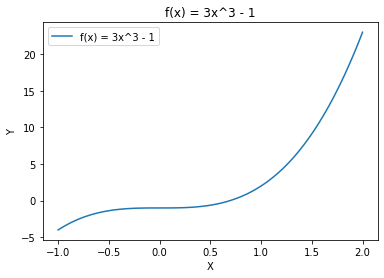

method                                        value    scipy value    realtive error
-------------------------------------  ------------  -------------  ----------------
Rectangular integration                8.2489875000   8.2500000000      0.0001227273
Trapezoidal integration                8.2520250000   8.2500000000      0.0002454545
Simpson integration                    8.2500000000   8.2500000000      0.0000000000
Gauss-Legendre integration degree = 2  8.2500000000   8.2500000000      0.0000000000
Gauss-Legendre integration degree = 3  8.2500000000   8.2500000000      0.0000000000
Gauss-Legendre integration degree = 4  8.2500000000   8.2500000000      0.0000000000
Gauss-Legendre integration degree = 5  8.2500000000   8.2500000000      0.0000000000 



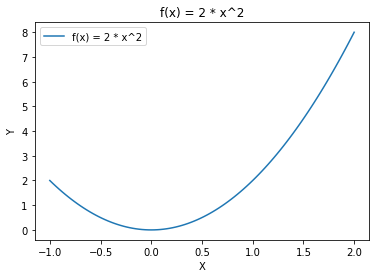

method                                        value    scipy value    realtive error
-------------------------------------  ------------  -------------  ----------------
Rectangular integration                5.9995500000   6.0000000000      0.0000750000
Trapezoidal integration                6.0009000000   6.0000000000      0.0001500000
Simpson integration                    6.0000000000   6.0000000000      0.0000000000
Gauss-Legendre integration degree = 2  6.0000000000   6.0000000000      0.0000000000
Gauss-Legendre integration degree = 3  6.0000000000   6.0000000000      0.0000000000
Gauss-Legendre integration degree = 4  6.0000000000   6.0000000000      0.0000000000
Gauss-Legendre integration degree = 5  6.0000000000   6.0000000000      0.0000000000 



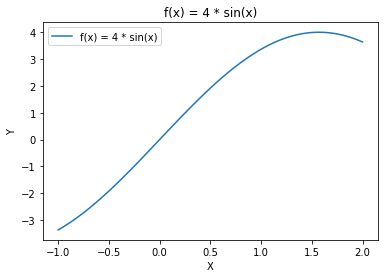

method                                        value    scipy value    realtive error
-------------------------------------  ------------  -------------  ----------------
Rectangular integration                3.8259400408   3.8257965697      0.0000375010
Trapezoidal integration                3.8255096306   3.8257965697      0.0000750011
Simpson integration                    3.8257965707   3.8257965697      0.0000000003
Gauss-Legendre integration degree = 2  3.8277381922   3.8257965697      0.0005075080
Gauss-Legendre integration degree = 3  3.8257764908   3.8257965697      0.0000052483
Gauss-Legendre integration degree = 4  3.8257966976   3.8257965697      0.0000000334
Gauss-Legendre integration degree = 5  3.8257965691   3.8257965697      0.0000000001 



In [18]:
calculate(-1, 2, 100)

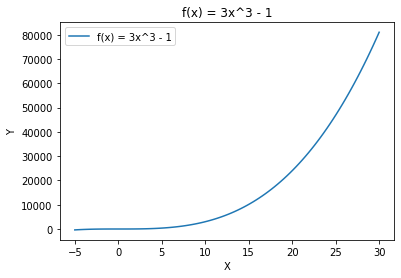

method                                             value        scipy value    realtive error
-------------------------------------  -----------------  -----------------  ----------------
Rectangular integration                606956.0546874998  606996.2500000000      0.0000662200
Trapezoidal integration                607076.6406249999  606996.2500000000      0.0001324401
Simpson integration                    606996.2499999998  606996.2500000000      0.0000000000
Gauss-Legendre integration degree = 2  606996.2500000002  606996.2500000000      0.0000000000
Gauss-Legendre integration degree = 3  606996.2499999999  606996.2500000000      0.0000000000
Gauss-Legendre integration degree = 4  606996.2499999999  606996.2500000000      0.0000000000
Gauss-Legendre integration degree = 5  606996.2500000000  606996.2500000000      0.0000000000 



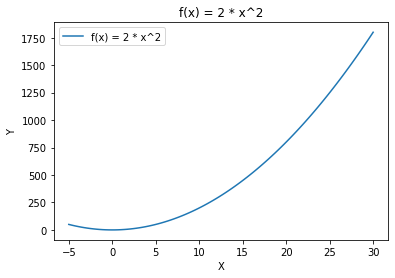

method                                            value       scipy value    realtive error
-------------------------------------  ----------------  ----------------  ----------------
Rectangular integration                18082.6187500000  18083.3333333333      0.0000395161
Trapezoidal integration                18084.7625000000  18083.3333333333      0.0000790323
Simpson integration                    18083.3333333333  18083.3333333333      0.0000000000
Gauss-Legendre integration degree = 2  18083.3333333333  18083.3333333333      0.0000000000
Gauss-Legendre integration degree = 3  18083.3333333333  18083.3333333333      0.0000000000
Gauss-Legendre integration degree = 4  18083.3333333333  18083.3333333333      0.0000000000
Gauss-Legendre integration degree = 5  18083.3333333333  18083.3333333333      0.0000000000 



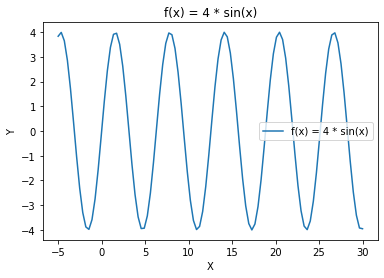

method                                         value    scipy value    realtive error
-------------------------------------  -------------  -------------  ----------------
Rectangular integration                 0.5202945489   0.5176429423      0.0051224625
Trapezoidal integration                 0.5123478503   0.5176429423      0.0102292363
Simpson integration                     0.5176456493   0.5176429423      0.0000052296
Gauss-Legendre integration degree = 2  -6.9610457381   0.5176429423     14.4475816616
Gauss-Legendre integration degree = 3  -3.1271933368   0.5176429423      7.0412169881
Gauss-Legendre integration degree = 4   3.9781266797   0.5176429423      6.6850785641
Gauss-Legendre integration degree = 5   1.7011568786   0.5176429423      2.2863519226 



In [19]:
calculate(-5, 30, 100)

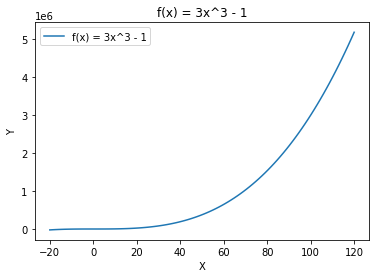

method                                                value           scipy value    realtive error
-------------------------------------  --------------------  --------------------  ----------------
Rectangular integration                155389570.0000000000  155399860.0000000000      0.0000662163
Trapezoidal integration                155420439.9999999702  155399860.0000000000      0.0001324326
Simpson integration                    155399859.9999999702  155399860.0000000000      0.0000000000
Gauss-Legendre integration degree = 2  155399860.0000000596  155399860.0000000000      0.0000000000
Gauss-Legendre integration degree = 3  155399859.9999999404  155399860.0000000000      0.0000000000
Gauss-Legendre integration degree = 4  155399859.9999999702  155399860.0000000000      0.0000000000
Gauss-Legendre integration degree = 5  155399859.9999999702  155399860.0000000000      0.0000000000 



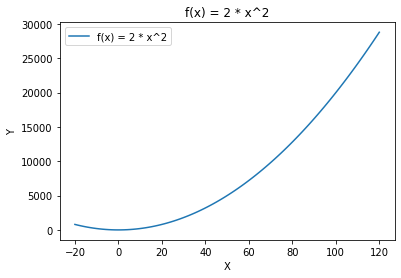

method                                              value         scipy value    realtive error
-------------------------------------  ------------------  ------------------  ----------------
Rectangular integration                1157287.5999999996  1157333.3333333335      0.0000395161
Trapezoidal integration                1157424.8000000000  1157333.3333333335      0.0000790323
Simpson integration                    1157333.3333333330  1157333.3333333335      0.0000000000
Gauss-Legendre integration degree = 2  1157333.3333333335  1157333.3333333335      0.0000000000
Gauss-Legendre integration degree = 3  1157333.3333333333  1157333.3333333335      0.0000000000
Gauss-Legendre integration degree = 4  1157333.3333333333  1157333.3333333335      0.0000000000
Gauss-Legendre integration degree = 5  1157333.3333333333  1157333.3333333335      0.0000000000 



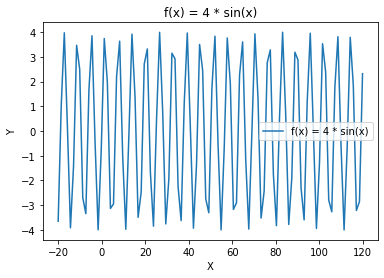

method                                           value    scipy value    realtive error
-------------------------------------  ---------------  -------------  ----------------
Rectangular integration                  -1.7650508003  -1.6243956349      0.0865892289
Trapezoidal integration                  -1.3499853147  -1.6243956349      0.1689307175
Simpson integration                      -1.6266956384  -1.6243956349      0.0014159134
Gauss-Legendre integration degree = 2    -9.2979951947  -1.6243956349      4.7239720393
Gauss-Legendre integration degree = 3    20.0181016401  -1.6243956349     13.3234150663
Gauss-Legendre integration degree = 4  -140.8337075011  -1.6243956349     85.6991418096
Gauss-Legendre integration degree = 5    92.0669628012  -1.6243956349     57.6776718835 



In [20]:
calculate(-20, 120, 100)

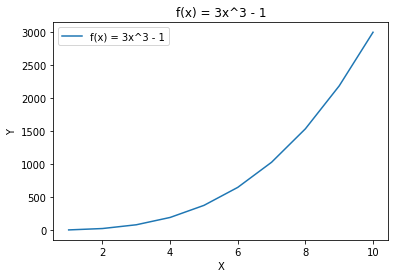

method                                           value      scipy value    realtive error
-------------------------------------  ---------------  ---------------  ----------------
Rectangular integration                7460.1787500000  7490.2500000000      0.0040147191
Trapezoidal integration                7550.3925000000  7490.2500000000      0.0080294383
Simpson integration                    7490.2500000000  7490.2500000000      0.0000000000
Gauss-Legendre integration degree = 2  7490.2500000000  7490.2500000000      0.0000000000
Gauss-Legendre integration degree = 3  7490.2500000000  7490.2500000000      0.0000000000
Gauss-Legendre integration degree = 4  7490.2500000000  7490.2500000000      0.0000000000
Gauss-Legendre integration degree = 5  7490.2500000000  7490.2500000000      0.0000000000 



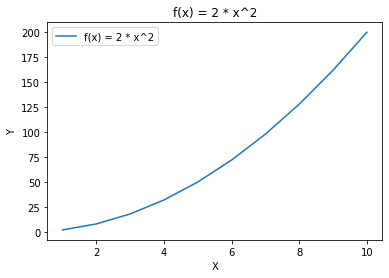

method                                          value     scipy value    realtive error
-------------------------------------  --------------  --------------  ----------------
Rectangular integration                664.7850000000  666.0000000000      0.0018243243
Trapezoidal integration                668.4300000000  666.0000000000      0.0036486486
Simpson integration                    666.0000000000  666.0000000000      0.0000000000
Gauss-Legendre integration degree = 2  666.0000000000  666.0000000000      0.0000000000
Gauss-Legendre integration degree = 3  666.0000000000  666.0000000000      0.0000000000
Gauss-Legendre integration degree = 4  666.0000000000  666.0000000000      0.0000000000
Gauss-Legendre integration degree = 5  666.0000000000  666.0000000000      0.0000000000 



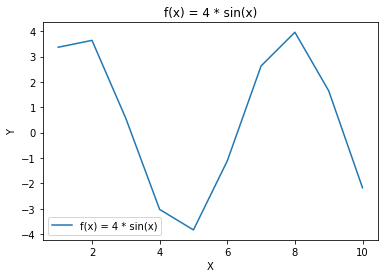

method                                        value    scipy value    realtive error
-------------------------------------  ------------  -------------  ----------------
Rectangular integration                5.7082060719   5.5174953398      0.0345647292
Trapezoidal integration                5.1399376171   5.5174953398      0.0684291874
Simpson integration                    5.5187832537   5.5174953398      0.0002334236
Gauss-Legendre integration degree = 2  1.9950144193   5.5174953398      0.6384202801
Gauss-Legendre integration degree = 3  5.8860909966   5.5174953398      0.0668048878
Gauss-Legendre integration degree = 4  5.4946609540   5.5174953398      0.0041385419
Gauss-Legendre integration degree = 5  5.5184330911   5.5174953398      0.0001699596 



In [21]:
calculate(1, 10, 10)

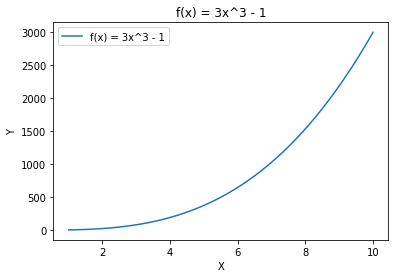

method                                           value      scipy value    realtive error
-------------------------------------  ---------------  ---------------  ----------------
Rectangular integration                7489.9492875000  7490.2500000000      0.0000401472
Trapezoidal integration                7490.8514250000  7490.2500000000      0.0000802944
Simpson integration                    7490.2500000000  7490.2500000000      0.0000000000
Gauss-Legendre integration degree = 2  7490.2500000000  7490.2500000000      0.0000000000
Gauss-Legendre integration degree = 3  7490.2500000000  7490.2500000000      0.0000000000
Gauss-Legendre integration degree = 4  7490.2500000000  7490.2500000000      0.0000000000
Gauss-Legendre integration degree = 5  7490.2500000000  7490.2500000000      0.0000000000 



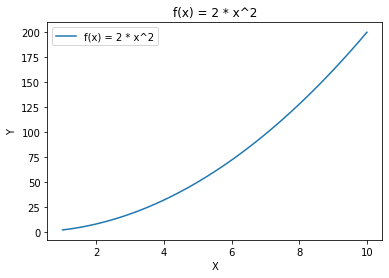

method                                          value     scipy value    realtive error
-------------------------------------  --------------  --------------  ----------------
Rectangular integration                665.9878500000  666.0000000000      0.0000182432
Trapezoidal integration                666.0243000000  666.0000000000      0.0000364865
Simpson integration                    666.0000000000  666.0000000000      0.0000000000
Gauss-Legendre integration degree = 2  666.0000000000  666.0000000000      0.0000000000
Gauss-Legendre integration degree = 3  666.0000000000  666.0000000000      0.0000000000
Gauss-Legendre integration degree = 4  666.0000000000  666.0000000000      0.0000000000
Gauss-Legendre integration degree = 5  666.0000000000  666.0000000000      0.0000000000 



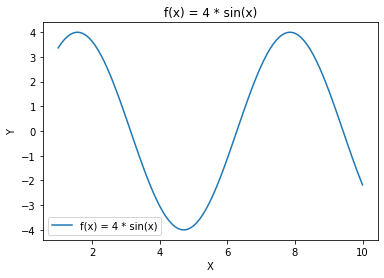

method                                        value    scipy value    realtive error
-------------------------------------  ------------  -------------  ----------------
Rectangular integration                5.5193579345   5.5174953398      0.0003375798
Trapezoidal integration                5.5137705275   5.5174953398      0.0006750911
Simpson integration                    5.5174954655   5.5174953398      0.0000000228
Gauss-Legendre integration degree = 2  1.9950144193   5.5174953398      0.6384202801
Gauss-Legendre integration degree = 3  5.8860909966   5.5174953398      0.0668048878
Gauss-Legendre integration degree = 4  5.4946609540   5.5174953398      0.0041385419
Gauss-Legendre integration degree = 5  5.5184330911   5.5174953398      0.0001699596 



In [22]:
calculate(1, 10, 100)

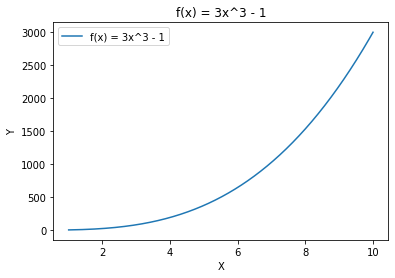

method                                           value      scipy value    realtive error
-------------------------------------  ---------------  ---------------  ----------------
Rectangular integration                7490.2469928750  7490.2500000000      0.0000004015
Trapezoidal integration                7490.2560142500  7490.2500000000      0.0000008029
Simpson integration                    7490.2500000000  7490.2500000000      0.0000000000
Gauss-Legendre integration degree = 2  7490.2500000000  7490.2500000000      0.0000000000
Gauss-Legendre integration degree = 3  7490.2500000000  7490.2500000000      0.0000000000
Gauss-Legendre integration degree = 4  7490.2500000000  7490.2500000000      0.0000000000
Gauss-Legendre integration degree = 5  7490.2500000000  7490.2500000000      0.0000000000 



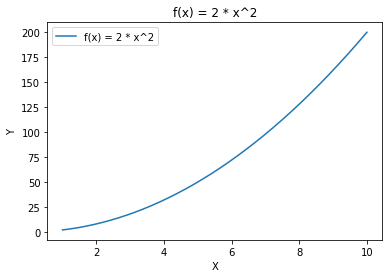

method                                          value     scipy value    realtive error
-------------------------------------  --------------  --------------  ----------------
Rectangular integration                665.9998785000  666.0000000000      0.0000001824
Trapezoidal integration                666.0002430000  666.0000000000      0.0000003649
Simpson integration                    666.0000000000  666.0000000000      0.0000000000
Gauss-Legendre integration degree = 2  666.0000000000  666.0000000000      0.0000000000
Gauss-Legendre integration degree = 3  666.0000000000  666.0000000000      0.0000000000
Gauss-Legendre integration degree = 4  666.0000000000  666.0000000000      0.0000000000
Gauss-Legendre integration degree = 5  666.0000000000  666.0000000000      0.0000000000 



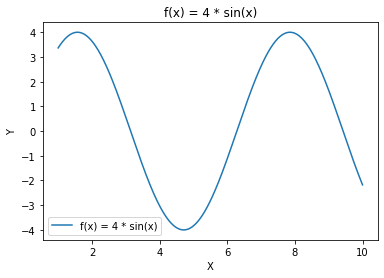

method                                        value    scipy value    realtive error
-------------------------------------  ------------  -------------  ----------------
Rectangular integration                5.5175139614   5.5174953398      0.0000033750
Trapezoidal integration                5.5174580966   5.5174953398      0.0000067500
Simpson integration                    5.5174953398   5.5174953398      0.0000000000
Gauss-Legendre integration degree = 2  1.9950144193   5.5174953398      0.6384202801
Gauss-Legendre integration degree = 3  5.8860909966   5.5174953398      0.0668048878
Gauss-Legendre integration degree = 4  5.4946609540   5.5174953398      0.0041385419
Gauss-Legendre integration degree = 5  5.5184330911   5.5174953398      0.0001699596 



In [23]:
calculate(1, 10, 1000)

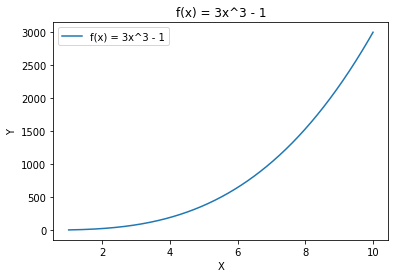

method                                           value      scipy value    realtive error
-------------------------------------  ---------------  ---------------  ----------------
Rectangular integration                7490.2499699287  7490.2500000000      0.0000000040
Trapezoidal integration                7490.2500601425  7490.2500000000      0.0000000080
Simpson integration                    7490.2500000000  7490.2500000000      0.0000000000
Gauss-Legendre integration degree = 2  7490.2500000000  7490.2500000000      0.0000000000
Gauss-Legendre integration degree = 3  7490.2500000000  7490.2500000000      0.0000000000
Gauss-Legendre integration degree = 4  7490.2500000000  7490.2500000000      0.0000000000
Gauss-Legendre integration degree = 5  7490.2500000000  7490.2500000000      0.0000000000 



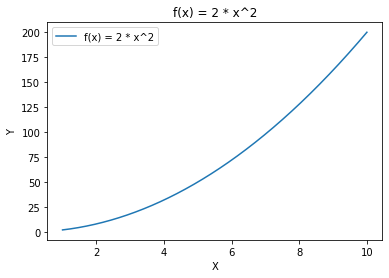

method                                          value     scipy value    realtive error
-------------------------------------  --------------  --------------  ----------------
Rectangular integration                665.9999987850  666.0000000000      0.0000000018
Trapezoidal integration                666.0000024300  666.0000000000      0.0000000036
Simpson integration                    666.0000000000  666.0000000000      0.0000000000
Gauss-Legendre integration degree = 2  666.0000000000  666.0000000000      0.0000000000
Gauss-Legendre integration degree = 3  666.0000000000  666.0000000000      0.0000000000
Gauss-Legendre integration degree = 4  666.0000000000  666.0000000000      0.0000000000
Gauss-Legendre integration degree = 5  666.0000000000  666.0000000000      0.0000000000 



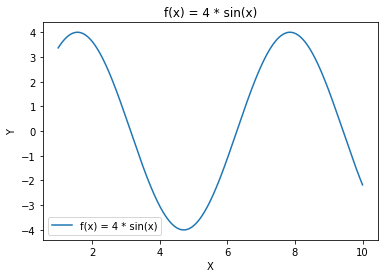

method                                        value    scipy value    realtive error
-------------------------------------  ------------  -------------  ----------------
Rectangular integration                5.5174955260   5.5174953398      0.0000000337
Trapezoidal integration                5.5174949673   5.5174953398      0.0000000675
Simpson integration                    5.5174953398   5.5174953398      0.0000000000
Gauss-Legendre integration degree = 2  1.9950144193   5.5174953398      0.6384202801
Gauss-Legendre integration degree = 3  5.8860909966   5.5174953398      0.0668048878
Gauss-Legendre integration degree = 4  5.4946609540   5.5174953398      0.0041385419
Gauss-Legendre integration degree = 5  5.5184330911   5.5174953398      0.0001699596 



In [24]:
calculate(1, 10, 10000)